In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.utils import pad_sequences
%matplotlib inline

In [5]:
df = pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


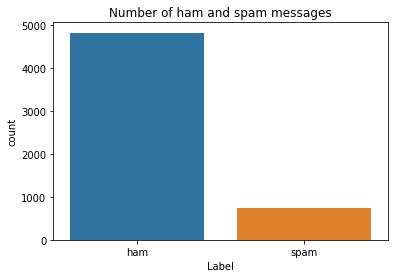

In [7]:
sns.countplot(df.Category)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')
X = df.Message
Y = df.Category
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [9]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

In [14]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256)(layer)
    layer = Activation('relu')(layer)
    layer = Dense(1,name='output')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [15]:
model = RNN()
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 150, 50)           50000     
                                                                 
 lstm_2 (LSTM)               (None, 64)                29440     
                                                                 
 dense_1 (Dense)             (None, 256)               16640     
                                                                 
 activation_4 (Activation)   (None, 256)               0         
                                                                 
 output (Dense)              (None, 1)                 257       
                                                                 
 activation_5 (Activation)   (None, 1)                 0   

In [22]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [23]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
30/30 [==============================] - 13s 304ms/step - loss: 0.3302 - accuracy: 0.8778 - val_loss: 0.1638 - val_accuracy: 0.9325
Epoch 2/10
30/30 [==============================] - 8s 278ms/step - loss: 0.0921 - accuracy: 0.9768 - val_loss: 0.0613 - val_accuracy: 0.9842


In [25]:
model.save('spam_sms.h5')

In [26]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)
test_sequences_matrix

array([[  0,   0,   0, ..., 267,  11, 145],
       [  0,   0,   0, ...,  29,   8,   3],
       [  0,   0,   0, ...,  17,   4, 918],
       ...,
       [  0,   0,   0, ...,   7,   2,   4],
       [  0,   0,   0, ...,   0, 957, 653],
       [  0,   0,   0, ...,  83,  16, 105]], dtype=int32)

In [27]:
accr = model.evaluate(test_sequences_matrix,Y_test)
print('Accuracy:',accr[1])
print('Loss:',accr[0])

27/27 [==============================] - 1s 39ms/step - loss: 0.0962 - accuracy: 0.9713
Accuracy: 0.9712918400764465
Loss: 0.09622055292129517
